# Practical 6: MRIO seminal works

**Objectives:**
- Learn how to replicate the methods and results from a few studies. 
- Understand and explain main results from EEIOA studies using MRIO seminal works

In [1]:
# Import modules
import pandas as pd
import numpy as np

# Set pandas number format
pd.options.display.float_format = '{:,.2f}'.format

## Data pre-processing

Based on [Exiobase's IOT_2019_pxp.zip](https://zenodo.org/record/5589597) dataset

### Load data

In [2]:
dir_path = "../data/exiobase/_pxp/IOT_2019_pxp/"

The folder has the following structure:  

```
├── impacts  
│   ├── F_Y.txt  
│   ├── F.txt  
│   └── ...
├── satellite  
│   ├── F_Y.txt  
│   ├── F.txt  
│   └── ...
├── A.txt
├── finaldemands.txt  
├── industries.txt  
├── products.txt  
├── unit.txt  
├── x.txt  
├── Y.txt  
└── Z.txt  
```

In [3]:
# Import A, Y, F and F_Y (from SATELLITE)
# ! 'A' is a large datasets, mind load time
A = pd.read_csv(f'{dir_path}A.txt', delimiter="\t", header=[0,1], index_col=[0,1])
Y = pd.read_csv(f'{dir_path}Y.txt', delimiter="\t", header=[0,1], index_col=[0,1])
# ! we use the satellite folder this time because we will look at uncharacterized stressors (CO2 emission vs GWP100)
F = pd.read_csv(f'{dir_path}satellite/F.txt', delimiter="\t", header=[0,1], index_col=[0])
F_y = pd.read_csv(f'{dir_path}satellite/F_Y.txt', delimiter="\t", header=[0,1], index_col=[0])
F_unit = pd.read_csv(f'{dir_path}satellite/unit.txt', delimiter="\t", header=0, index_col=[0])

### Get labels

In [4]:
# get multiindex
region_and_sector_labels = A.index

# get each level using  'get_level_values()'
region_labels = A.index.get_level_values(level=0).unique()
sector_labels = A.index.get_level_values(level=1).unique()

# visualize
region_labels

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO',
       'SE', 'SI', 'SK', 'GB', 'US', 'JP', 'CN', 'CA', 'KR', 'BR', 'IN', 'MX',
       'RU', 'AU', 'CH', 'TR', 'TW', 'NO', 'ID', 'ZA', 'WA', 'WL', 'WE', 'WF',
       'WM'],
      dtype='object', name='region')

## Input-Output calculations
### Leontief inverse

In [5]:
# Create an identity matrix the same order
Id = np.identity(len(region_and_sector_labels))

# Compute leontief inverse matrix in the Demand-pull model
L_values = np.linalg.inv((Id - A))
L = pd.DataFrame(
    data=L_values,
    index=region_and_sector_labels,
    columns=region_and_sector_labels
)

# we also save LY to avoid repeating calculations
LY = L @ Y

### Product output X

In [6]:
# Compute using L
x = LY.sum(axis=1)

## Exercise 1
[Hertwich and Peters (2009)](https://doi.org/10.1021/es803496a) developed an analysis of the carbon footprint of multiple countries in 2001. Their results show the carbon footprint of different final demand categories per product.

![global CP2 footprint](../img/global_CO2_footprint.png) 
Figure 1. Global CO2 footprint for different consumption categories and users retrieved from Hertwich and Peters (2009)

In this exercise you will reproduce these results using EXIOBASE and compare any changes between 2001 and 2011

### Environmental intensity

In [7]:
# compute extension intensity
f = F / x.T
f = f.replace([np.inf, -np.inf, np.nan], 0)  # ! don't forget to replace

# Visualise
f

region                                                     AT        \
sector                                             Paddy rice Wheat   
stressor                                                              
Taxes less subsidies on products purchased: Total        0.00  0.02   
Other net taxes on production                            0.00 -0.05   
Compensation of employees; wages, salaries, & e...       0.00  0.00   
Compensation of employees; wages, salaries, & e...       0.00  0.04   
Compensation of employees; wages, salaries, & e...       0.00  0.01   
...                                                       ...   ...   
Energy Carrier Net TMAR                                  0.00  0.00   
Energy Carrier Net TOTH                                  0.00  0.00   
Energy Carrier Net TRAI                                  0.00  0.00   
Energy Carrier Net TROA                                  0.00  4.21   
Energy Carrier Net LOSS                                  0.00  0.00   

region                                                                \
sector                                             Cereal grains nec   
stressor                                                               
Taxes less subsidies on products purchased: Total               0.01   
Other net taxes on production                                  -0.04   
Compensation of employees; wages, salaries, & e...              0.00   
Compensation of employees; wages, salaries, & e...              0.03   
Compensation of employees; wages, salaries, & e...              0.01   
...                                                              ...   
Energy Carrier Net TMAR                                         0.00   
Energy Carrier Net TOTH                                         0.00   
Energy Carrier Net TRAI                                         0.00   
Energy Carrier Net TROA                                         0.25   
Energy Carrier Net LOSS                                         0.00   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
stressor                                                                     
Taxes less subsidies on products purchased: Total                     0.01   
Other net taxes on production                                        -0.03   
Compensation of employees; wages, salaries, & e...                    0.00   
Compensation of employees; wages, salaries, & e...                    0.03   
Compensation of employees; wages, salaries, & e...                    0.00   
...                                                                    ...   
Energy Carrier Net TMAR                                               0.00   
Energy Carrier Net TOTH                                               0.00   
Energy Carrier Net TRAI                                               0.00   
Energy Carrier Net TROA                                               0.39   
Energy Carrier Net LOSS                                               0.00   

region                                                        \
sector                                             Oil seeds   
stressor                                                       
Taxes less subsidies on products purchased: Total       0.01   
Other net taxes on production                          -0.05   
Compensation of employees; wages, salaries, & e...      0.00   
Compensation of employees; wages, salaries, & e...      0.02   
Compensation of employees; wages, salaries, & e...      0.00   
...                                                      ...   
Energy Carrier Net TMAR                                 0.00   
Energy Carrier Net TOTH                                 0.00   
Energy Carrier Net TRAI                                 0.00   
Energy Carrier Net TROA                                 0.21   
Energy Carrier Net LOSS                                 0.00   

region

### Contribution of Final Demand to the CO2 footprint

Calculate the CO2 footprint of the global final demand matrix `Y`. But this time, we will only focus on the following categories and keep them disaggregated:
- `households` (y_hh)
- `government expenditures` (y_gov)
- `gross capital formation` (y_gfcf)

We do not look at
- $\mathbf{fLY}$ 

But instead we look at:
- $\mathbf{fL\hat{Y}}$

In [8]:
# select extension indicator
CO2 = 'CO2 - combustion - air'

# select final demand sectors
HH = 'Final consumption expenditure by households' 
GOV = 'Final consumption expenditure by government'	
GFCF = 'Gross fixed capital formation'
categories = [HH, GOV, GFCF]

In [9]:
# Select only the Y we are interested in
Y_column_slice = pd.IndexSlice[:, categories]
Y_categories = Y.loc[:, Y_column_slice]
Y_categories_global = Y_categories.groupby('category', axis=1).sum()  # aggregate regions for global perspective
Y_categories_global = Y_categories_global.reindex(columns=categories)  # always reindex after groupby to avoid confusion

# Display the result
Y_categories_global

category                                                  Final consumption expenditure by households  \
region sector                                                                                           
AT     Paddy rice                                                                                0.00   
       Wheat                                                                                   141.85   
       Cereal grains nec                                                                       220.33   
       Vegetables, fruit, nuts                                                               1,250.29   
       Oil seeds                                                                                31.71   
...                                                                                               ...   
WM     Membership organisation services n.e.c. (91)                                          4,669.82   
       Recreational, cultural and sporting services (92)                                    27,195.79   
       Other services (93)                                                                  26,342.79   
       Private households with employed persons (95)                                         3,499.27   
       Extra-territorial organizations and bodies                                                0.00   

category                                                  Final consumption expenditure by government  \
region sector                                                                                           
AT     Paddy rice                                                                                0.00   
       Wheat                                                                                     0.30   
       Cereal grains nec                                                                         0.25   
       Vegetables, fruit, nuts                                                                   0.30   
       Oil seeds                                                                                 0.01   
...                                                                                               ...   
WM     Membership organisation services n.e.c. (91)                                          1,700.18   
       Recreational, cultural and sporting services (92)                                     7,552.83   
       Other services (93)                                                                     231.46   
       Private households with employed persons (95)                                           259.32   
       Extra-territorial organizations and bodies                                                0.00   

category                                                  Gross fixed capital formation  
region sector                                                                            
AT     Paddy rice                                                                  0.00  
       Wheat                                                                       0.00  
       Cereal grains nec                                                           0.00  
       Vegetables, fruit, nuts                                                     1.05  
       Oil seeds                                                                   0.00  
...                                                                                 ...  
WM     Membership organisation services n.e.c. (91)                                0.00  
       Recreational, cultural and sporting services (92)                       2,692.60  
       Other services (93)                                                     1,382.32  
       Private households with employed persons (95)                              42.06  
       Extra-territorial organizations and bodies                                  0.00  

[9800 rows x 3 columns]

In [10]:
f_co2 = f.loc[CO2]  # single indicator

# This time we calculate f @ L @ diag(Y) = (f @ L) * Y.T  --> See practical 4 and 5 for more info
fLdiagY_co2_global = (f_co2 @ L) * Y_categories_global.T  # ! the right side of * needs to be transposed if it contains multiple columns
fLdiagY_co2_global = fLdiagY_co2_global.T  # retranspose to conserve original layout
fLdiagY_co2_global

category                                                  Final consumption expenditure by households  \
region sector                                                                                           
AT     Paddy rice                                                                                0.00   
       Wheat                                                                           108,781,206.17   
       Cereal grains nec                                                                77,173,338.46   
       Vegetables, fruit, nuts                                                         180,204,513.31   
       Oil seeds                                                                        10,795,557.36   
...                                                                                               ...   
WM     Membership organisation services n.e.c. (91)                                  1,690,726,172.63   
       Recreational, cultural and sporting services (92)                             9,760,243,458.62   
       Other services (93)                                                          11,864,288,881.32   
       Private households with employed persons (95)                                   653,177,521.87   
       Extra-territorial organizations and bodies                                                0.00   

category                                                  Final consumption expenditure by government  \
region sector                                                                                           
AT     Paddy rice                                                                                0.00   
       Wheat                                                                               229,621.19   
       Cereal grains nec                                                                    85,998.52   
       Vegetables, fruit, nuts                                                              43,304.76   
       Oil seeds                                                                             2,230.74   
...                                                                                               ...   
WM     Membership organisation services n.e.c. (91)                                    615,555,538.95   
       Recreational, cultural and sporting services (92)                             2,710,619,703.01   
       Other services (93)                                                             104,244,842.50   
       Private households with employed persons (95)                                    48,404,339.68   
       Extra-territorial organizations and bodies                                                0.00   

category                                                  Gross fixed capital formation  
region sector                                                                            
AT     Paddy rice                                                                  0.00  
       Wheat                                                                       0.00  
       Cereal grains nec                                                          37.21  
       Vegetables, fruit, nuts                                               150,796.63  
       Oil seeds                                                                   0.00  
...                                                                                 ...  
WM     Membership organisation services n.e.c. (91)                                0.00  
       Recreational, cultural and sporting services (92)                 966,341,432.84  
       Other services (93)                                               622,569,691.50  
       Private households with employed persons (95)                       7,850,999.13  
       Extra-territorial organizations and bodies                                  0.00  

[9800 rows x 3 columns]

### Aggregate CO2 footprint per sector

In [11]:
# aggregate results per product category
df_co2 = fLdiagY_co2_global.groupby('sector', axis=0).sum()
df_co2 = df_co2.reindex(index = sector_labels)  # always reindex after groupby to avoid confusion
df_co2

category,Final consumption expenditure by households,Final consumption expenditure by government,Gross fixed capital formation
sector,,,
Paddy rice,"116,322,571,755.49","2,764,598,342.29","256,913.39"
Wheat,"87,746,671,931.27","4,301,932,144.98","154,253,612.18"
Cereal grains nec,"41,233,141,647.13","542,627,689.27","48,262,243.00"
"Vegetables, fruit, nuts","143,398,309,458.15","2,258,875,935.47","1,671,478,796.20"
Oil seeds,"5,563,191,054.71","252,439,378.09","497,464.74"
...,...,...,...
Membership organisation services n.e.c. (91),"40,205,297,561.21","6,227,451,128.45",0.00
"Recreational, cultural and sporting services (92)","145,421,732,873.65","45,340,248,589.07","12,419,922,298.03"
Other services (93),"219,653,610,587.52","1,094,399,583.15","2,627,977,953.07"


### Cluster relevant sectors

In [12]:
# cluster relevant sectors together
clusters = {
    'agriculture & mining' : sector_labels[0:41],
    'manufacturing': sector_labels[41:149],
    'construction': sector_labels[149:151],
    'service': sector_labels[151:200],
}

# create empty dataframe
Footprint = pd.DataFrame(
    data=np.nan, 
    index=clusters.keys(), 
    columns=df_co2.columns
)

# and fill it
for cluster, labels in clusters.items():
    Footprint.loc[cluster] = df_co2.loc[labels].sum(axis=0)

# Display results
Footprint

category,Final consumption expenditure by households,Final consumption expenditure by government,Gross fixed capital formation
agriculture & mining,"611,303,209,649.19","29,453,775,510.79","259,537,976,942.51"
manufacturing,"8,074,338,839,864.05","402,108,578,137.80","3,238,261,862,919.04"
construction,"25,909,252,226.01","3,384,018,418.26","5,666,713,029,647.45"
service,"4,438,305,487,152.97","2,341,873,211,377.06","507,861,922,807.02"


<Axes: title={'center': "'CO2 - combustion - air' per final demand category"}, xlabel="['kg']", ylabel='category'>

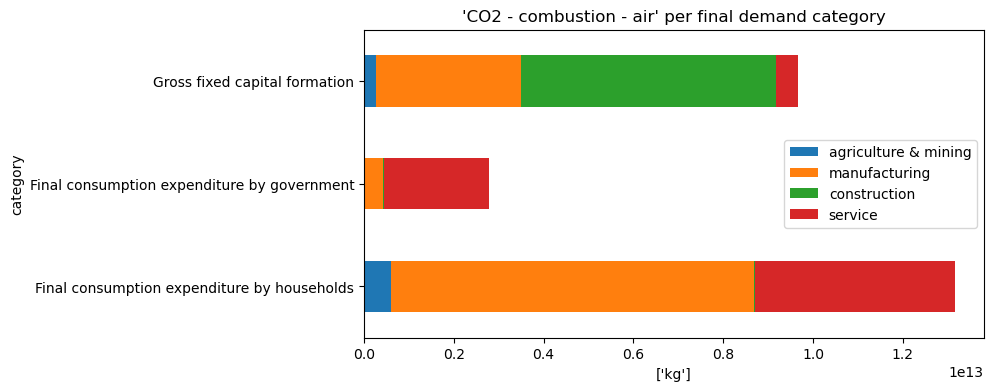

In [13]:
# Plot results
Footprint.T.plot(  # transpose to show per final demand sector
    figsize = (8,4),
    kind = 'barh',
    stacked=True,
    xlabel = F_unit.loc[CO2].values, #
    title = f"'{CO2}' per final demand category",
)

## Going further

### Use vectorization to include all CO2 indicators

See practical 5 for more information

In [14]:
# Retrieve all CO2 indicators
MASK = f.index.str.contains("CO2")
CO2 = f.loc[MASK].index
CO2

Index(['CO2 - combustion - air',
       'CO2 - non combustion - Cement production - air',
       'CO2 - non combustion - Lime production - air',
       'CO2 - agriculture - peat decay - air', 'CO2 - waste - biogenic - air',
       'CO2 - waste - fossil - air'],
      dtype='object', name='stressor')

#### Case 1: all CO2 indicators for a single country

In [15]:
# set the country we want to look at
country = 'NL'

In [16]:
# see Practical 5 for more info

# Create index for future pd.DataFrame
column_labels = pd.MultiIndex.from_product(
    iterables=[CO2, categories], 
    names=['stressor', 'category']
)

# Create empty pd.Dataframe
fLdiagY_co2_1country = pd.DataFrame(
    data=np.nan, 
    index=region_and_sector_labels,
    columns=column_labels
)

# 1 indicator x multiple categories at a time
for indicator in CO2:
    f_indicator = f.loc[indicator]  # single indicator
    Y_categories_1country = Y_categories.loc[:, country] # single country but multiple categories
    fLdiagY_indicator_1country = (f_indicator @ L) * Y_categories_1country.T 
    fLdiagY_indicator_1country = fLdiagY_indicator_1country.T
    fLdiagY_indicator_1country = fLdiagY_indicator_1country.reindex(index=region_and_sector_labels)
    fLdiagY_co2_1country[indicator] = fLdiagY_indicator_1country.values

# Display results
fLdiagY_co2_1country

stressor                                                                      CO2 - combustion - air  \
category                                                 Final consumption expenditure by households   
region sector                                                                                          
AT     Paddy rice                                                                               0.00   
       Wheat                                                                              621,913.15   
       Cereal grains nec                                                                  264,032.62   
       Vegetables, fruit, nuts                                                            523,971.89   
       Oil seeds                                                                                0.00   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                           475.73   
       Recreational, cultural and sporting services (92)                                        0.00   
       Other services (93)                                                                653,044.09   
       Private households with employed persons (95)                                            0.00   
       Extra-territorial organizations and bodies                                               0.00   

stressor                                                                                              \
category                                                 Final consumption expenditure by government   
region sector                                                                                          
AT     Paddy rice                                                                               0.00   
       Wheat                                                                                    0.00   
       Cereal grains nec                                                                        0.00   
       Vegetables, fruit, nuts                                                                  0.00   
       Oil seeds                                                                                0.00   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                           393.07   
       Recreational, cultural and sporting services (92)                                        0.00   
       Other services (93)                                                                      0.00   
       Private households with employed persons (95)                                            0.00   
       Extra-territorial organizations and bodies                                               0.00   

stressor                                                                                \
category                                                 Gross fixed capital formation   
region sector                                                                            
AT     Paddy rice                                                                 0.00   
       Wheat                                                                      0.00   
       Cereal grains nec                                                          0.00   
       Vegetables, fruit, nuts                                                    0.00   
       Oil seeds                                                                  0.00   
...                                                                                ...   
WM     Membership organisation services n.e.c. (91)                               0.00   
       Recreational, cultural and sporting services (92)                          0.00   
       Other services (93)                                                        0.00   
      

In [17]:
# Alternative method (swap column levels)

# Create index for future pd.DataFrame
column_labels_swap = pd.MultiIndex.from_product(
    iterables=[categories, CO2],   # we swap the order
    names=['category', 'stressor']
)

# Create empty pd.DataFrame
fLdiagY_co2_1country_ = pd.DataFrame(
    data=np.nan,
    index=region_and_sector_labels,
    columns=column_labels_swap
)

# multiple indicators x 1 category at a time
for category in categories:
    Y_column_slice = pd.IndexSlice[country, category]
    Y_1category = Y_categories.loc[:, Y_column_slice]
    fLdiagY_co2_1category = (f_co2 @ L) * Y_1category.T 
    fLdiagY_co2_1category = fLdiagY_co2_1category.T
    fLdiagY_co2_1category = fLdiagY_co2_1category.reindex(index=region_and_sector_labels)
    fLdiagY_co2_1country_[category] = fLdiagY_co2_1category.values

# Uncomment to display results
# fLdiagY_co2_1country_

#### Case 2: all CO2 indicators for whole world

In [18]:
# Create index for future pd.DataFrame
column_labels = pd.MultiIndex.from_product(
    iterables=[CO2, categories], 
    names=['stressor', 'category']
)

# Create empty pd.DataFrame
fLdiagY_co2_global = pd.DataFrame(
    data=np.nan,
    index=region_and_sector_labels,
    columns=column_labels
)

# 1 indicator x multiple categories at a time
for indicator in CO2:
    f_indicator = f.loc[indicator]  # single indicator
    Y_categories_global = Y_categories.groupby('category', axis=1).sum()  # keep category, sum countries
    Y_categories_global = Y_categories_global.reindex(columns = categories)  # reindex after groupby
    fLdiagY_indicator_global = (f_indicator @ L) * Y_categories_global.T 
    fLdiagY_indicator_global = fLdiagY_indicator_global.T
    fLdiagY_indicator_global = fLdiagY_indicator_global.reindex(index=region_and_sector_labels)
    fLdiagY_co2_global[indicator] = fLdiagY_indicator_global.values

# Display results
fLdiagY_co2_global

stressor                                                                      CO2 - combustion - air  \
category                                                 Final consumption expenditure by households   
region sector                                                                                          
AT     Paddy rice                                                                               0.00   
       Wheat                                                                          108,781,206.17   
       Cereal grains nec                                                               77,173,338.46   
       Vegetables, fruit, nuts                                                        180,204,513.31   
       Oil seeds                                                                       10,795,557.36   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                 1,690,726,172.63   
       Recreational, cultural and sporting services (92)                            9,760,243,458.62   
       Other services (93)                                                         11,864,288,881.32   
       Private households with employed persons (95)                                  653,177,521.87   
       Extra-territorial organizations and bodies                                               0.00   

stressor                                                                                              \
category                                                 Final consumption expenditure by government   
region sector                                                                                          
AT     Paddy rice                                                                               0.00   
       Wheat                                                                              229,621.19   
       Cereal grains nec                                                                   85,998.52   
       Vegetables, fruit, nuts                                                             43,304.76   
       Oil seeds                                                                            2,230.74   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                   615,555,538.95   
       Recreational, cultural and sporting services (92)                            2,710,619,703.01   
       Other services (93)                                                            104,244,842.50   
       Private households with employed persons (95)                                   48,404,339.68   
       Extra-territorial organizations and bodies                                               0.00   

stressor                                                                                \
category                                                 Gross fixed capital formation   
region sector                                                                            
AT     Paddy rice                                                                 0.00   
       Wheat                                                                      0.00   
       Cereal grains nec                                                         37.21   
       Vegetables, fruit, nuts                                              150,796.63   
       Oil seeds                                                                  0.00   
...                                                                                ...   
WM     Membership organisation services n.e.c. (91)                               0.00   
       Recreational, cultural and sporting services (92)                966,341,432.84   
       Other services (93)                                              622,569,691.50   
      

In [19]:
# Create index for future pd.DataFrame
column_labels_swap = pd.MultiIndex.from_product(
    iterables=[categories, CO2],    # we swap the order
    names=['category', 'stressor']
)

# Create empty pd.DataFrame
fLdiagY_co2_global_ = pd.DataFrame(
    data=np.nan, 
    index=region_and_sector_labels,
    columns=column_labels_swap
)

f_co2 = f.loc[CO2]  # multiple indicators

# multiple indicators x 1 category at a time
for category in categories:
    Y_column_slice = pd.IndexSlice[:, category]
    Y_category_countries = Y.loc[:, Y_column_slice]  # 1 category but multiple regions
    Y_category_global = Y_category_countries.groupby('category', axis=1).sum()  # keep the category, sum countries
    Y_category_global = Y_category_global[category]  # remember we need a pd.Series
    fLdiagY_co2_category_global = (f_co2 @ L) * Y_category_global.T
    fLdiagY_co2_category_global = fLdiagY_co2_category_global.T
    fLdiagY_co2_category_global = fLdiagY_co2_category_global.reindex(index=region_and_sector_labels, columns=CO2)
    fLdiagY_co2_global_[category] = fLdiagY_co2_category_global.values

# Uncomment to display results
# fLdiagY_co2_global_

#### Cluster relevant sectors together

In [20]:
# keep final demand categories (column) and sum CO2 emissions together
# df_co2 = fLdiagY_co2_1country.groupby('category', axis=1).sum()  # All CO2 emissions for 1 country
df_co2 = fLdiagY_co2_global.groupby('category', axis=1).sum()    # All CO2 emissions globally

# keep sector (rows) and sum countries together
df_co2 = df_co2.groupby('sector', axis=0).sum()  
df_co2 = df_co2.reindex(index=sector_labels, columns=categories)  # always reindex after groupby to avoid confusion

# create empty dataframe
Footprint = pd.DataFrame(np.nan, index=clusters.keys(), columns=df_co2.columns)
# and fill it
for cluster, labels in clusters.items():
    Footprint.loc[cluster] = df_co2.loc[labels].sum(axis=0)

# Display results
Footprint

category,Final consumption expenditure by households,Final consumption expenditure by government,Gross fixed capital formation
agriculture & mining,"637,897,268,436.55","30,848,441,383.72","271,286,082,798.91"
manufacturing,"8,202,855,942,126.35","406,278,924,911.58","3,275,591,164,176.39"
construction,"34,139,799,362.27","4,421,891,022.26","7,350,805,049,193.24"
service,"4,552,315,942,472.70","2,401,927,429,413.99","520,039,494,705.15"


<Axes: title={'center': 'Global CO2 emissions per final demand category (all indicators)'}, ylabel='category'>

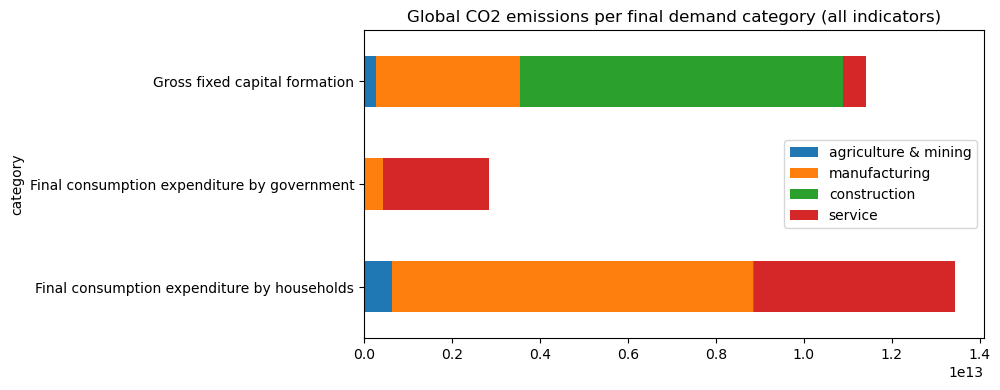

In [21]:
# Plot results
Footprint.T.plot(  # transpose to show per final demand sector
    figsize = (8,4),
    kind = 'barh',
    stacked=True,
    title = f"Global CO2 emissions per final demand category (all indicators)",
)

## References
Hertwich, E. G., & Peters, G. P. (2009). Carbon footprint of nations: A global, trade-linked analysis. Environmental Science and Technology, 43(16), 6414–6420. https://doi.org/10.1021/es803496a

Wood, R., Stadler, K., Simas, M., Bulavskaya, T., Giljum, S., Lutter, S., & Tukker, A. (2018). Growth in Environmental Footprints and Environmental Impacts Embodied in Trade: Resource Efficiency Indicators from EXIOBASE3. Journal of Industrial Ecology, 22(3), 553–562. https://doi.org/10.1111/jiec.12735